# Assigment 6: Weather Data Analysis
Author: Anna Lozenko

Get data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

In [66]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

In [67]:
#import data from URL

#url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
#delete the first 23 rows that are not part of the data table and load the data into a dataframe
#df = pd.read_csv(url, skiprows = 23, low_memory=False) #set low_memory to False to avoid dtype warning
#df.head()

In [68]:
df = pd.read_csv("weather_data.csv", skiprows = 23, low_memory=False)
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10/04/1996 14:00,0,0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31/07/1996 08:00,0,0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31/07/1996 09:00,0,0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31/07/1996 10:00,0,0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31/07/1996 11:00,0,0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [69]:
#check if there are any missing values in the dataframe
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [70]:
#check data types of the columns
print(df.dtypes)

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object


In [71]:
#convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M")
print(df.dtypes)

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp             object
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object


In [72]:
#set the date column as the index
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format = "%d%m%Y %H:%M")
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0,0,14.5,0,10.8,7.0,0.0,0,1011,0,0,0,0,2,11,0.0,40000,40,6


As I can see from the data, there is partial information for the days 10/04/1996 and 31/07/1996. Data is missing between those 2 days. To ensure the accuracy of our analysis, I will remove these two days from the dataset.

In [73]:
#remove data before 01/08/1996
df = df[df.index >= '1996-08-01']
df.head(10)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-08-01 00:00:00,0,0,0,9.7,0,9.0,8.3,0.0,0,1011.4,0,0,0,0,1,81,0.0,35000,999,3
1996-08-01 01:00:00,0,0,0,9.1,0,8.5,7.9,10.6,92,1011.4,2,6,2,230,2,11,0.0,35000,999,4
1996-08-01 02:00:00,0,0,0,10.0,0,8.6,7.1,10.0,82,1011.2,2,8,2,240,2,11,0.0,35000,50,5
1996-08-01 03:00:00,0,0,0,10.3,0,9.3,8.3,10.9,87,1011.2,2,9,2,250,2,11,0.0,35000,44,5
1996-08-01 04:00:00,0,0,0,10.3,0,8.8,7.2,10.1,81,1011.1,2,8,2,240,2,11,0.0,30000,46,6
1996-08-01 05:00:00,0,0,0,10.0,0,9.1,8.2,10.8,88,1011.3,2,8,2,250,2,11,0.0,30000,40,7
1996-08-01 06:00:00,0,0,0,10.2,0,9.2,8.1,10.8,87,1011.5,2,8,2,250,2,11,0.0,30000,43,7
1996-08-01 07:00:00,0,0,0,10.7,0,9.5,8.3,10.9,85,1011.8,2,7,2,240,2,11,0.0,25000,45,7
1996-08-01 08:00:00,0,0,0,10.6,0,9.7,8.8,11.3,89,1012.2,2,11,2,250,2,11,0.0,30000,42,7


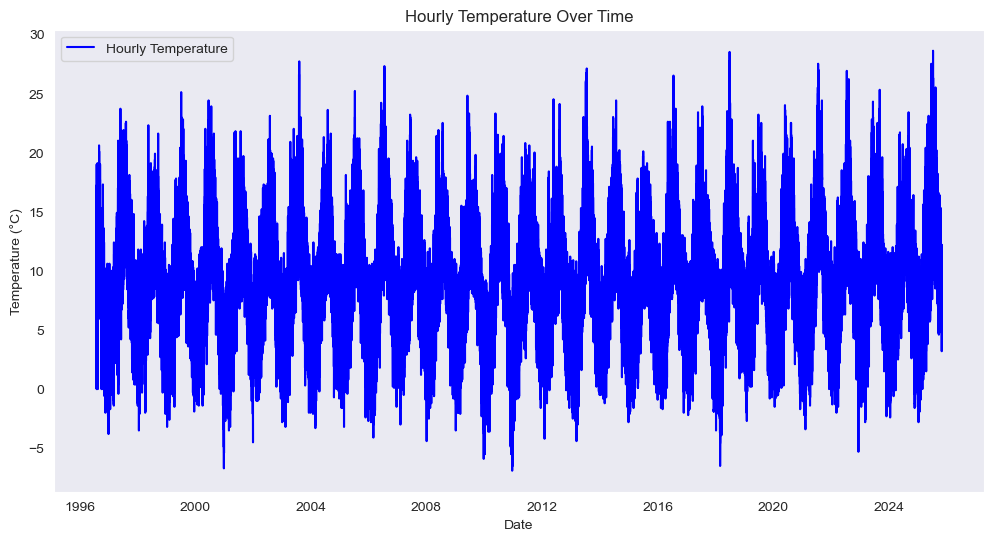

In [74]:
#plot the temperature data for the entire period (1996-2025)
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temp'], color='blue', label='Hourly Temperature')
plt.title('Hourly Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

As we can see from the plot, there are seasonal variations in temperature over the years. But to better understand the trends, we can calculate the mean temperature for each month and each day.

## Plot the mean temperature for each month

In [75]:
print(df['temp'].head())

date
1996-08-01 00:00:00     9.7
1996-08-01 01:00:00     9.1
1996-08-01 02:00:00    10.0
1996-08-01 03:00:00    10.3
1996-08-01 04:00:00    10.3
Name: temp, dtype: float64


Compute the monthly mean temperature for each year.

In [81]:
#resample the data to monthly frequency and calculate the mean temperature for each month
monthly_mean = df["temp"].resample("ME").mean()
print(monthly_mean.head())

date
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
1996-11-30     4.909444
1996-12-31     3.209946
Freq: ME, Name: temp, dtype: float64


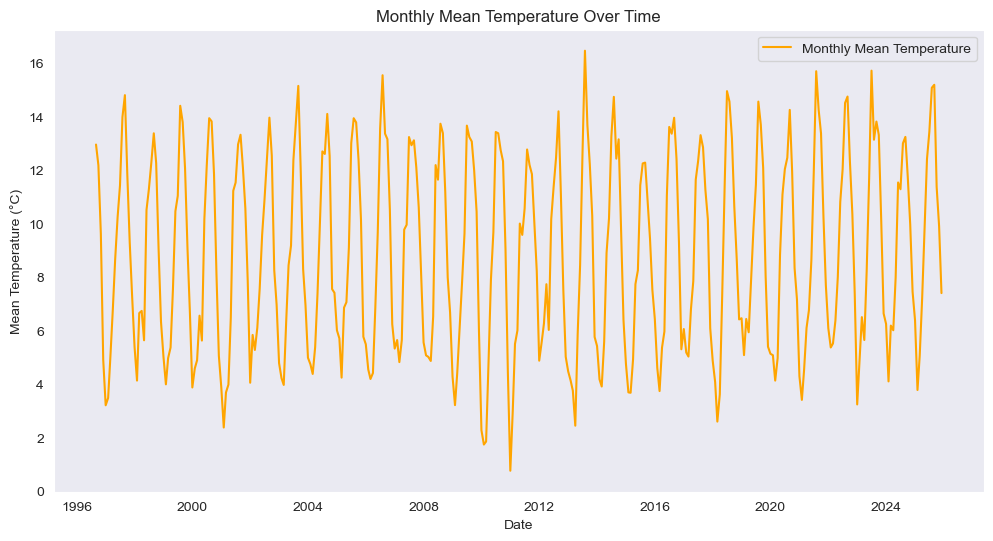

In [82]:
#plot the monthly average temperatures (01/08/1996 - 31/07/2025)
plt.figure(figsize=(12,6))
plt.plot(monthly_mean.index, monthly_mean, color='orange', label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

Alternatively, we can visualize the monthly mean temperatures for each year in a single plot to observe seasonal patterns.

In [100]:
#create a dataframe from the monthly mean series
monthly_mean_df = monthly_mean.to_frame("temp")
monthly_mean_df["year"] = monthly_mean_df.index.year #extract year from the index
monthly_mean_df["month"] = monthly_mean_df.index.month #extract month from the index
print(monthly_mean_df.head())


                 temp  year  month
date                              
1996-08-31  12.946909  1996      8
1996-09-30  12.174306  1996      9
1996-10-31   9.614113  1996     10
1996-11-30   4.909444  1996     11
1996-12-31   3.209946  1996     12


In [101]:
#create a pivot table to have years as rows and months as columns
pivot = monthly_mean_df.pivot(index="year", columns="month", values="temp")
pivot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.946909,12.174306,9.614113,4.909444,3.209946
1997,3.483065,4.990476,6.770833,8.663056,10.246909,11.422500,13.975806,14.792204,11.857639,9.282661,7.298194,5.388441
1998,4.132796,6.654018,6.734946,5.637778,10.508468,11.281806,12.274866,13.366801,12.255833,9.018414,6.331250,5.033468
1999,3.992876,4.973363,5.367742,7.545833,10.458199,11.032222,14.394489,13.785484,12.054444,9.054167,6.694861,3.875672
2000,4.586022,4.891810,6.556452,5.627361,10.159946,12.150417,13.931989,13.811694,11.843611,8.099462,5.065417,3.874597


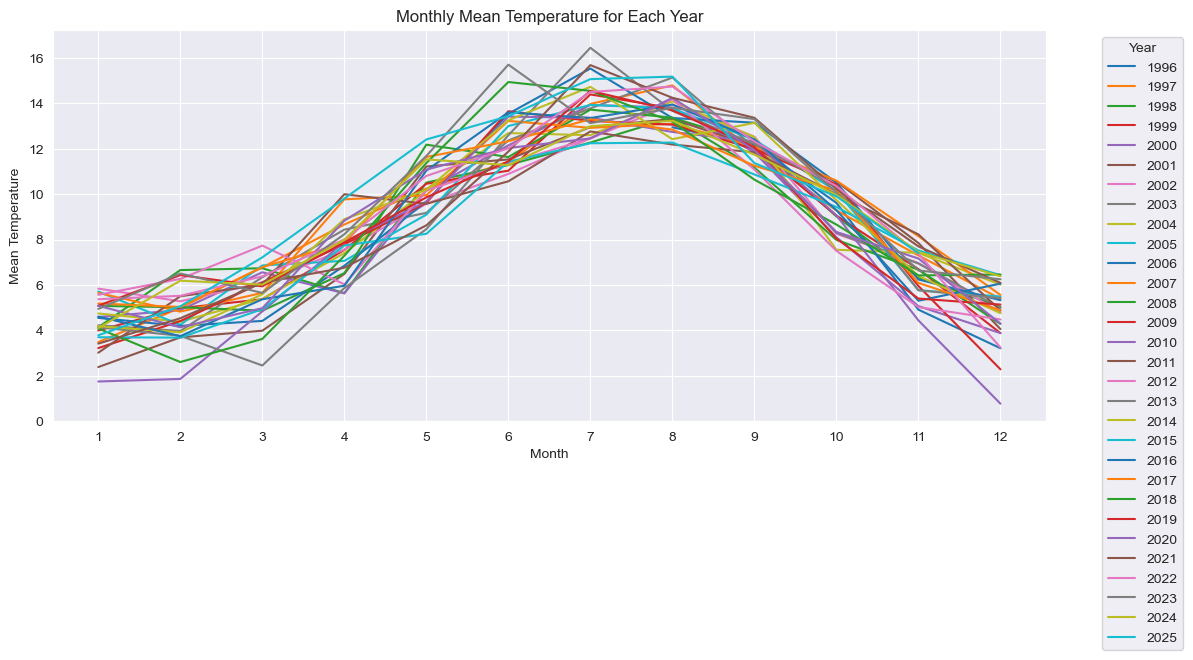

In [102]:
#plot the monthly mean temperature for each year, with months on the x-axis, temperature on the y-axis and different lines for each year
plt.figure(figsize=(12,6))

for yr in pivot.index:
    plt.plot(pivot.columns, pivot.loc[yr], label=str(yr))

plt.xlabel("Month")
plt.ylabel("Mean Temperature")
plt.title("Monthly Mean Temperature for Each Year")
plt.xticks(range(1, 13))
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Plot the mean temperature for each day

In [111]:
# resample the data to daily frequency and calculate the mean temperature for each day
daily_mean = df["temp"].resample("D").mean()
print(daily_mean.head())

date
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
1996-08-05    11.520833
Freq: D, Name: temp, dtype: float64


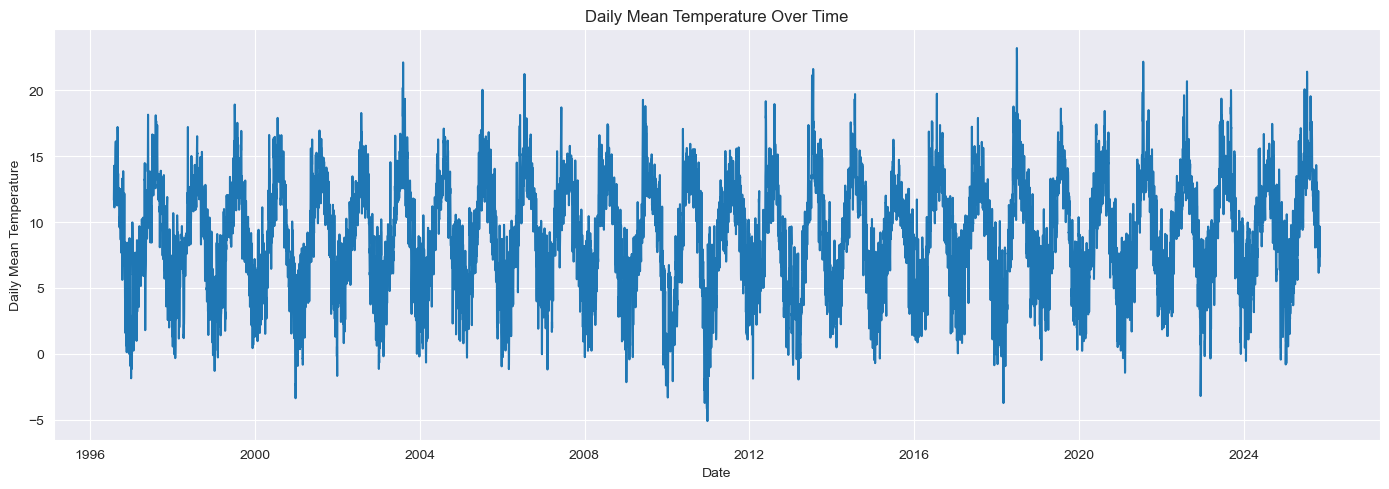

In [112]:
# plot the daily average temperatures (01/08/1996 - 31/07/2025)
plt.figure(figsize=(14,5))
plt.plot(daily_mean.index, daily_mean.values)
plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature")
plt.title("Daily Mean Temperature Over Time")
plt.tight_layout()
plt.show()
